In [2]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def first_cheby_poly(x, n):
    '''Generate n-th order Chebyshev ploynominals of first kind.'''
    if n == 0: return 1
    elif n == 1: return x
    result = 2. * x * first_cheby_poly(x, 1) - first_cheby_poly(x, 0)
    m = 0
    while n - m > 2:
        result = 2. * x * result - first_cheby_poly(x, m+1)
        m += 1
    return result
    
def reduced_T(T, T_min, T_max):
    '''Calculate the reduced temperature.'''
    T=float(T)
    T_min=float(T_min)
    T_max = float(T_max)
    T_tilde = 2.0 * T ** (-1) - T_min ** (-1) - T_max ** (-1)
    T_tilde /= (T_max ** (-1) - T_min ** (-1))
    return T_tilde
        
def reduced_P(P, P_min, P_max):
    '''Calculate the reduced pressure.'''
    P_tilde = 2.0 * np.log(P) - np.log(P_min) - np.log(P_max)
    P_tilde /= (np.log(P_max) - np.log(P_min))
    return P_tilde
        
def fit_cheby_poly(n_T, n_P, k, T_ls, P_ls):
    '''Fit the Chebyshev polynominals to rate constants.
          Input rate constants vector k should be arranged based on pressure.'''
    cheb_mat = np.zeros((len(k), n_T * n_P))
    for n, P in enumerate(P_ls):       # !! assume that at each presssure, we have the same temperateure range
        P_min = P_ls[0]
        P_max = P_ls[-1]
        for m, T in enumerate(T_ls):
            T_min = T_ls[0]
            T_max = T_ls[-1]
            for i in range(n_P):
                P_tilde = reduced_P(P, P_min, P_max)
                P_cheb = first_cheby_poly(P_tilde, i)
                for j in range(n_T):
                    T_tilde = reduced_T(T, T_min, T_max)
                    T_cheb = first_cheby_poly(T_tilde, j)
                    cheb_mat[n*len(T_ls)+m, i*n_T+j] = P_cheb * T_cheb
                        
    coef = np.linalg.pinv(cheb_mat)
    coef = np.dot(coef, k)
    return coef

In [18]:
gas = ct.Solution('FFCM1_custom.cti')
k = [[],[],[],[],[],[]]
temperature=[[],[],[],[],[],[]]
for i,pressure in enumerate([.1,1,3,5,7,10]):
    for temp in np.arange(200,2401): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k[i].append(gas.forward_rate_constants[0]*1000)
        temperature[i].append(temp)

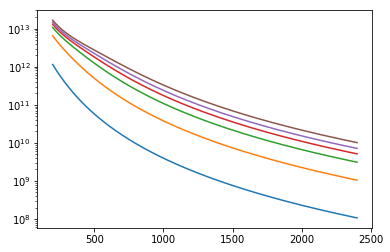

In [19]:
plt.figure()
plt.semilogy(temperature[0],k[0])
plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])
plt.semilogy(temperature[3],k[3])
plt.semilogy(temperature[4],k[4])
plt.semilogy(temperature[5],k[5])

In [20]:
k_combined=np.log10(np.array(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]))
temp_combined=temperature[0]
pressure_combined = [.1,1,3,5,7,10]
len(k_combined)
len(temp_combined)

2201

In [49]:
coef = fit_cheby_poly(17,3,k_combined,temp_combined,pressure_combined)

In [50]:
coef.reshape(3,17).T


array([[ 1.15546717e+01,  7.71281152e-01, -5.48575850e-02],
       [-1.57180339e+00,  2.27606056e-01,  4.60781584e-02],
       [-5.72924366e-01,  1.72880294e-02,  1.71782753e-02],
       [-2.29305430e-01, -2.20273707e-02, -5.46343006e-03],
       [-9.05043167e-02, -8.02328221e-03, -5.53194322e-03],
       [-3.72688948e-02,  1.23957693e-03, -3.44277235e-04],
       [-1.70020002e-02,  1.84311617e-03,  1.09023692e-03],
       [-8.38580426e-03,  3.98130232e-04,  4.12609996e-04],
       [-4.17699576e-03, -1.91194981e-04, -8.43614484e-05],
       [-2.03532067e-03, -1.31569619e-04, -1.04617282e-04],
       [-9.90127952e-04, -1.02227572e-05, -1.71982579e-05],
       [-4.88761434e-04,  1.84991274e-05,  1.31682063e-05],
       [-2.52037796e-04,  7.41301885e-06,  6.93555356e-06],
       [-1.24604228e-04, -7.31222429e-07, -1.85351431e-07],
       [-6.96799846e-05, -1.33603841e-06, -1.15523228e-06],
       [-2.55839897e-05, -3.46303083e-07, -3.71010725e-07],
       [-2.86466692e-05,  2.09133731e-07

In [39]:
coef_original = np.array([[ 1.15546836e+01,  7.71281146e-01, -5.48575900e-02],
       [-1.57180898e+00,  2.27606063e-01,  4.60781706e-02],
       [-5.72924379e-01,  1.72880172e-02,  1.71782633e-02],
       [-2.29300688e-01, -2.20273602e-02, -5.46341376e-03],
       [-9.05048435e-02, -8.02330015e-03, -5.53196144e-03],
       [-3.72633262e-02,  1.23959527e-03, -3.44252245e-04],
       [-1.70034875e-02,  1.84308782e-03,  1.09020732e-03],
       [-8.37880692e-03,  3.98161803e-04,  4.12649732e-04],
       [-4.18011388e-03, -1.91240271e-04, -8.44096814e-05],
       [-2.02592038e-03, -1.31516683e-04, -1.04553611e-04],
       [-9.96116289e-04, -1.02957411e-05, -1.72772050e-05],
       [-4.74895864e-04,  1.85884849e-05,  1.32731460e-05],
       [-2.64105290e-04,  7.28925005e-06,  6.79924856e-06],
       [-9.74103669e-05, -5.60663433e-07,  1.58725754e-08],
       [-1.07767662e-04, -1.61382394e-06, -1.47510016e-06]])



**** WARNING ****
For species HOCHO, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1679
['CO + OH <=> CO2 + H', '2 OH <=> H2O2']


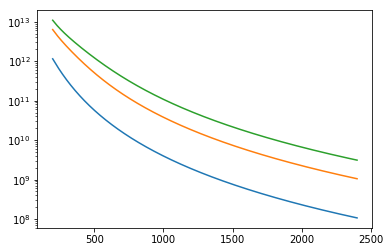

In [44]:
gas = ct.Solution('cheby_pressure_test.cti')
k2 = [[],[],[],[],[],[]]
temperature2=[[],[],[],[],[],[]]
for i,pressure in enumerate([.1,1,3,5,7,10]):
    for temp in np.arange(200,2400): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k2[i].append(gas.forward_rate_constants[1]*1000)
        temperature2[i].append(temp)
#plt.figure()
plt.semilogy(temperature2[0],k2[0])
plt.semilogy(temperature2[1],k2[1])
plt.semilogy(temperature2[2],k2[2])
print(gas.reaction_equations())

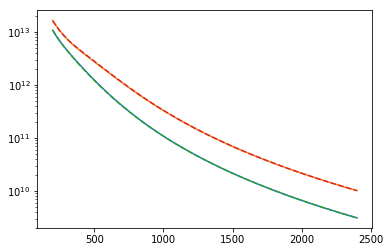

In [31]:
#plt.semilogy(temperature[0],k[0])
#plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])
#plt.semilogy(temperature[3],k[3])
#plt.semilogy(temperature[4],k[4])
plt.semilogy(temperature[5],k[5])

#plt.semilogy(temperature2[0],k2[0],'--')
#plt.semilogy(temperature2[1],k2[1],'--')
plt.semilogy(temperature2[2],k2[2],'--')
#plt.semilogy(temperature2[3],k2[3],'--')
#plt.semilogy(temperature2[4],k2[4],'--')
plt.semilogy(temperature2[5],k2[5],'--')

array([[ 1.15590262e+01,  7.71281180e-01, -5.48575888e-02],
       [-1.57180902e+00,  2.27606037e-01,  4.60781758e-02],
       [-5.72924384e-01,  1.72880049e-02,  1.71782568e-02],
       [-2.29300684e-01, -2.20273586e-02, -5.46341596e-03],
       [-9.05048415e-02, -8.02329616e-03, -5.53195952e-03],
       [-3.72633263e-02,  1.23959627e-03, -3.44251052e-04],
       [-1.70034879e-02,  1.84308716e-03,  1.09020711e-03],
       [-8.37880705e-03,  3.98161323e-04,  4.12649348e-04],
       [-4.18011385e-03, -1.91240285e-04, -8.44097490e-05],
       [-2.02592034e-03, -1.31516582e-04, -1.04553542e-04],
       [-9.96116284e-04, -1.02957044e-05, -1.72771683e-05],
       [-4.74895869e-04,  1.85884765e-05,  1.32731426e-05],
       [-2.64105292e-04,  7.28924059e-06,  6.79924041e-06],
       [-9.74103669e-05, -5.60665360e-07,  1.58702265e-08],
       [-1.07767661e-04, -1.61382196e-06, -1.47509848e-06]])

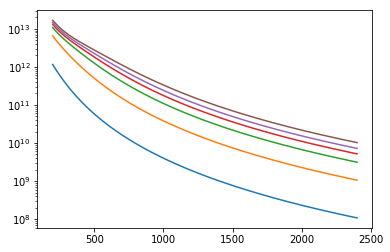

In [32]:
# PERTURBING A
gas = ct.Solution('FFCM1_custom_updated.cti')
k = [[],[],[],[],[],[]]
temperature=[[],[],[],[],[],[]]
for i,pressure in enumerate([.1,1,3,5,7,10]):
    for temp in np.arange(200,2401): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k[i].append(gas.forward_rate_constants[0]*1000)
        temperature[i].append(temp)
plt.figure()
plt.semilogy(temperature[0],k[0])
plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])
plt.semilogy(temperature[3],k[3])
plt.semilogy(temperature[4],k[4])
plt.semilogy(temperature[5],k[5])
k_combined=np.log10(np.array(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]))
temp_combined=temperature[0]
pressure_combined = [.1,1,3,5,7,10]
coef = fit_cheby_poly(15,3,k_combined,temp_combined,pressure_combined)
coef.reshape(3,15).T


In [35]:
A_coefficient = np.array([[ 1.15590262e+01,  7.71281180e-01, -5.48575888e-02],
       [-1.57180902e+00,  2.27606037e-01,  4.60781758e-02],
       [-5.72924384e-01,  1.72880049e-02,  1.71782568e-02],
       [-2.29300684e-01, -2.20273586e-02, -5.46341596e-03],
       [-9.05048415e-02, -8.02329616e-03, -5.53195952e-03],
       [-3.72633263e-02,  1.23959627e-03, -3.44251052e-04],
       [-1.70034879e-02,  1.84308716e-03,  1.09020711e-03],
       [-8.37880705e-03,  3.98161323e-04,  4.12649348e-04],
       [-4.18011385e-03, -1.91240285e-04, -8.44097490e-05],
       [-2.02592034e-03, -1.31516582e-04, -1.04553542e-04],
       [-9.96116284e-04, -1.02957044e-05, -1.72771683e-05],
       [-4.74895869e-04,  1.85884765e-05,  1.32731426e-05],
       [-2.64105292e-04,  7.28924059e-06,  6.79924041e-06],
       [-9.74103669e-05, -5.60665360e-07,  1.58702265e-08],
       [-1.07767661e-04, -1.61382196e-06, -1.47509848e-06]])

array([[ 1.15815116e+01,  7.71281146e-01, -5.48575900e-02],
       [-1.56701454e+00,  2.27606063e-01,  4.60781706e-02],
       [-5.71601157e-01,  1.72880172e-02,  1.71782633e-02],
       [-2.28813770e-01, -2.20273602e-02, -5.46341376e-03],
       [-9.03032615e-02, -8.02330015e-03, -5.53196144e-03],
       [-3.71743256e-02,  1.23959527e-03, -3.44252245e-04],
       [-1.69625392e-02,  1.84308782e-03,  1.09020732e-03],
       [-8.35945358e-03,  3.98161803e-04,  4.12649732e-04],
       [-4.17075018e-03, -1.91240271e-04, -8.44096814e-05],
       [-2.02135556e-03, -1.31516683e-04, -1.04553611e-04],
       [-9.93820629e-04, -1.02957411e-05, -1.72772050e-05],
       [-4.73789680e-04,  1.85884849e-05,  1.32731460e-05],
       [-2.63494987e-04,  7.28925005e-06,  6.79924856e-06],
       [-9.71876300e-05, -5.60663433e-07,  1.58725752e-08],
       [-1.07520913e-04, -1.61382394e-06, -1.47510016e-06]])

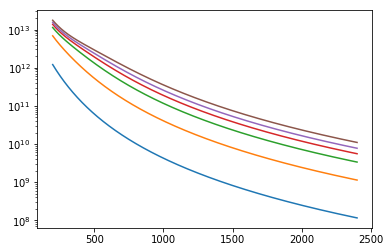

In [33]:
# PERTURBING n
gas = ct.Solution('FFCM1_custom_updated.cti')
k = [[],[],[],[],[],[]]
temperature=[[],[],[],[],[],[]]
for i,pressure in enumerate([.1,1,3,5,7,10]):
    for temp in np.arange(200,2401): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k[i].append(gas.forward_rate_constants[0]*1000)
        temperature[i].append(temp)
plt.figure()
plt.semilogy(temperature[0],k[0])
plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])
plt.semilogy(temperature[3],k[3])
plt.semilogy(temperature[4],k[4])
plt.semilogy(temperature[5],k[5])
k_combined=np.log10(np.array(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]))
temp_combined=temperature[0]
pressure_combined = [.1,1,3,5,7,10]
coef = fit_cheby_poly(15,3,k_combined,temp_combined,pressure_combined)
coef.reshape(3,15).T


In [36]:
n_coefficient = np.array([[ 1.15815116e+01,  7.71281146e-01, -5.48575900e-02],
       [-1.56701454e+00,  2.27606063e-01,  4.60781706e-02],
       [-5.71601157e-01,  1.72880172e-02,  1.71782633e-02],
       [-2.28813770e-01, -2.20273602e-02, -5.46341376e-03],
       [-9.03032615e-02, -8.02330015e-03, -5.53196144e-03],
       [-3.71743256e-02,  1.23959527e-03, -3.44252245e-04],
       [-1.69625392e-02,  1.84308782e-03,  1.09020732e-03],
       [-8.35945358e-03,  3.98161803e-04,  4.12649732e-04],
       [-4.17075018e-03, -1.91240271e-04, -8.44096814e-05],
       [-2.02135556e-03, -1.31516683e-04, -1.04553611e-04],
       [-9.93820629e-04, -1.02957411e-05, -1.72772050e-05],
       [-4.73789680e-04,  1.85884849e-05,  1.32731460e-05],
       [-2.63494987e-04,  7.28925005e-06,  6.79924856e-06],
       [-9.71876300e-05, -5.60663433e-07,  1.58725752e-08],
       [-1.07520913e-04, -1.61382394e-06, -1.47510016e-06]])

array([[ 1.15546718e+01,  7.71281146e-01, -5.48575900e-02],
       [-1.57179903e+00,  2.27606063e-01,  4.60781706e-02],
       [-5.72924379e-01,  1.72880172e-02,  1.71782633e-02],
       [-2.29300688e-01, -2.20273602e-02, -5.46341376e-03],
       [-9.05048435e-02, -8.02330015e-03, -5.53196144e-03],
       [-3.72633262e-02,  1.23959527e-03, -3.44252245e-04],
       [-1.70034875e-02,  1.84308782e-03,  1.09020732e-03],
       [-8.37880692e-03,  3.98161803e-04,  4.12649732e-04],
       [-4.18011388e-03, -1.91240271e-04, -8.44096814e-05],
       [-2.02592038e-03, -1.31516683e-04, -1.04553611e-04],
       [-9.96116289e-04, -1.02957411e-05, -1.72772050e-05],
       [-4.74895864e-04,  1.85884849e-05,  1.32731460e-05],
       [-2.64105290e-04,  7.28925005e-06,  6.79924856e-06],
       [-9.74103669e-05, -5.60663433e-07,  1.58725752e-08],
       [-1.07767662e-04, -1.61382394e-06, -1.47510016e-06]])

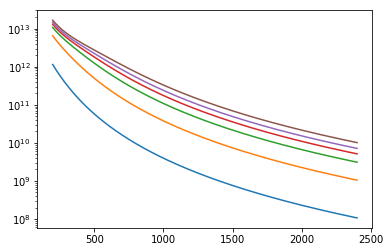

In [34]:
# PERTURBING Ea
gas = ct.Solution('FFCM1_custom_updated.cti')
k = [[],[],[],[],[],[]]
temperature=[[],[],[],[],[],[]]
for i,pressure in enumerate([.1,1,3,5,7,10]):
    for temp in np.arange(200,2401): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k[i].append(gas.forward_rate_constants[0]*1000)
        temperature[i].append(temp)
plt.figure()
plt.semilogy(temperature[0],k[0])
plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])
plt.semilogy(temperature[3],k[3])
plt.semilogy(temperature[4],k[4])
plt.semilogy(temperature[5],k[5])
k_combined=np.log10(np.array(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]))
temp_combined=temperature[0]
pressure_combined = [.1,1,3,5,7,10]
coef = fit_cheby_poly(15,3,k_combined,temp_combined,pressure_combined)
coef.reshape(3,15).T

In [38]:
Ea_coefficient = np.array([[ 1.15546718e+01,  7.71281146e-01, -5.48575900e-02],
       [-1.57179903e+00,  2.27606063e-01,  4.60781706e-02],
       [-5.72924379e-01,  1.72880172e-02,  1.71782633e-02],
       [-2.29300688e-01, -2.20273602e-02, -5.46341376e-03],
       [-9.05048435e-02, -8.02330015e-03, -5.53196144e-03],
       [-3.72633262e-02,  1.23959527e-03, -3.44252245e-04],
       [-1.70034875e-02,  1.84308782e-03,  1.09020732e-03],
       [-8.37880692e-03,  3.98161803e-04,  4.12649732e-04],
       [-4.18011388e-03, -1.91240271e-04, -8.44096814e-05],
       [-2.02592038e-03, -1.31516683e-04, -1.04553611e-04],
       [-9.96116289e-04, -1.02957411e-05, -1.72772050e-05],
       [-4.74895864e-04,  1.85884849e-05,  1.32731460e-05],
       [-2.64105290e-04,  7.28925005e-06,  6.79924856e-06],
       [-9.74103669e-05, -5.60663433e-07,  1.58725752e-08],
       [-1.07767662e-04, -1.61382394e-06, -1.47510016e-06]])

In [41]:
A_sensitivity = (A_coefficient- coef_original)/.01
A_sensitivity

array([[ 4.34260000e-01,  3.40000000e-06,  1.20000000e-07],
       [-4.00000000e-06, -2.60000000e-06,  5.20000000e-07],
       [-4.99999997e-07, -1.23000000e-06, -6.50000000e-07],
       [ 4.00000000e-07,  1.60000000e-07, -2.20000000e-07],
       [ 2.00000000e-07,  3.99000000e-07,  1.92000000e-07],
       [-1.00000001e-08,  1.00000000e-07,  1.19300000e-07],
       [-3.99999998e-08, -6.60000000e-08, -2.10000000e-08],
       [-1.29999999e-08, -4.80000000e-08, -3.84000000e-08],
       [ 2.99999999e-09, -1.40000000e-09, -6.76000000e-09],
       [ 3.99999998e-09,  1.01000000e-08,  6.90000000e-09],
       [ 4.99999998e-10,  3.67000000e-09,  3.67000000e-09],
       [-5.00000003e-10, -8.40000000e-10, -3.40000000e-10],
       [-1.99999999e-10, -9.46000000e-10, -8.15000000e-10],
       [ 0.00000000e+00, -1.92700000e-10, -2.34890000e-10],
       [ 9.99999996e-11,  1.98000000e-10,  1.68000000e-10]])

In [42]:
n_sensitivity = (n_coefficient- coef_original)/.01
n_sensitivity

array([[ 2.682800e+00,  0.000000e+00,  0.000000e+00],
       [ 4.794440e-01,  0.000000e+00,  0.000000e+00],
       [ 1.323222e-01,  0.000000e+00,  0.000000e+00],
       [ 4.869180e-02,  0.000000e+00,  0.000000e+00],
       [ 2.015820e-02,  0.000000e+00,  0.000000e+00],
       [ 8.900060e-03,  0.000000e+00,  0.000000e+00],
       [ 4.094830e-03,  0.000000e+00,  0.000000e+00],
       [ 1.935334e-03,  0.000000e+00,  0.000000e+00],
       [ 9.363700e-04,  0.000000e+00,  0.000000e+00],
       [ 4.564820e-04,  0.000000e+00,  0.000000e+00],
       [ 2.295660e-04,  0.000000e+00,  0.000000e+00],
       [ 1.106184e-04,  0.000000e+00,  0.000000e+00],
       [ 6.103030e-05,  0.000000e+00,  0.000000e+00],
       [ 2.227369e-05,  0.000000e+00, -2.000000e-14],
       [ 2.467490e-05,  0.000000e+00,  0.000000e+00]])

In [43]:
Ea_sensitivity = (Ea_coefficient- coef_original)/.01
Ea_sensitivity

array([[-1.18e-03,  0.00e+00,  0.00e+00],
       [ 9.95e-04,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00, -2.00e-14],
       [ 0.00e+00,  0.00e+00,  0.00e+00]])